# research questions


- RQ1: Are reviews for some categories of product on Amazon overall more positive than for other categories? → polarity
- RQ2: Are reviews more subjective for some classes of products than for others?
- RQ3: Which aspects of different classes of products are the most important in the reviews?
- RQ4: Can one predict the star rating from the review text?

# data exploration

In [76]:
import pandas as pd
from dataloader import get_all_data

# df = get_all_data(sample_size=100_000) # 2.92 GB
df = get_all_data(sample_size=10_000)

for col in df.columns:
    print(f"\n{col}:")
    print(f"\tunique values: {df[col].nunique()}")
    print(f"\tmissing values: {df[col].isnull().sum()}")
    print(f"\tmost common values: {list(df[col].value_counts().head(5).index)}")

total data size: 0.33 gb

rating:
	unique values: 5
	missing values: 0
	most common values: [5.0, 4.0, 3.0, 1.0, 2.0]

title:
	unique values: 227350
	missing values: 44
	most common values: ['Five Stars', 'Four Stars', 'Great', 'Three Stars', 'Good Product']

text:
	unique values: 317812
	missing values: 48
	most common values: ['Good Product', 'Good', 'Great', 'Love it', 'Great product']

images:
	unique values: 23422
	missing values: 0
	most common values: ['[]', "[{'small_image_url': 'https://images-na.ssl-images-amazon.com/images/I/712fps8+3XL._SL256_.jpg', 'medium_image_url': 'https://images-na.ssl-images-amazon.com/images/I/712fps8+3XL._SL800_.jpg', 'large_image_url': 'https://images-na.ssl-images-amazon.com/images/I/712fps8+3XL.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71URdP9ZKsL._SL256_.jpg', 'medium_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71URdP9ZKsL._SL800_.jpg', 'large_image_url': 'https://

In [78]:
print(df.dtypes)
df.head()

rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
category              object
dtype: object


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,category
0,4.0,Soft,I wear headbands like this in the evening when...,[],B082NKQ4ZT,B082NKQ4ZT,AHV6QCNBJNSGLATP56JAWJ3C4G2A,1583932042329,0,False,All_Beauty
1,4.0,"TRY THIS! test on FACE for match not hands, ev...",I first tried it on the back of my hand and wa...,[{'small_image_url': 'https://images-na.ssl-im...,B08GSKRQKD,B08GSKRQKD,AF2BLE54TEMGZ546U763ZHZRXC4A,1612277896403,0,False,All_Beauty
2,5.0,Excellent product,This is so very good for my hair,[],B01DD1NOZU,B01DD1NOZU,AHU2GG5RF6YAEWUFNLH3QH5RHDNQ,1637952741170,0,True,All_Beauty
3,5.0,Five Stars,My daughter loves the foot pedicure unit.,[],B01H1RGQGQ,B01H1RGQGQ,AGTR4A6CYH6AGEIYCAPYPQZERZLQ,1486999572000,0,True,All_Beauty
4,5.0,Awesome foundation!,I am so glad they made a product like this bec...,[{'small_image_url': 'https://images-na.ssl-im...,B07V9V5R48,B07V9V5R48,AFV22L7AEKI2LW6HMLRLUKNYVBGQ,1568738284832,7,True,All_Beauty


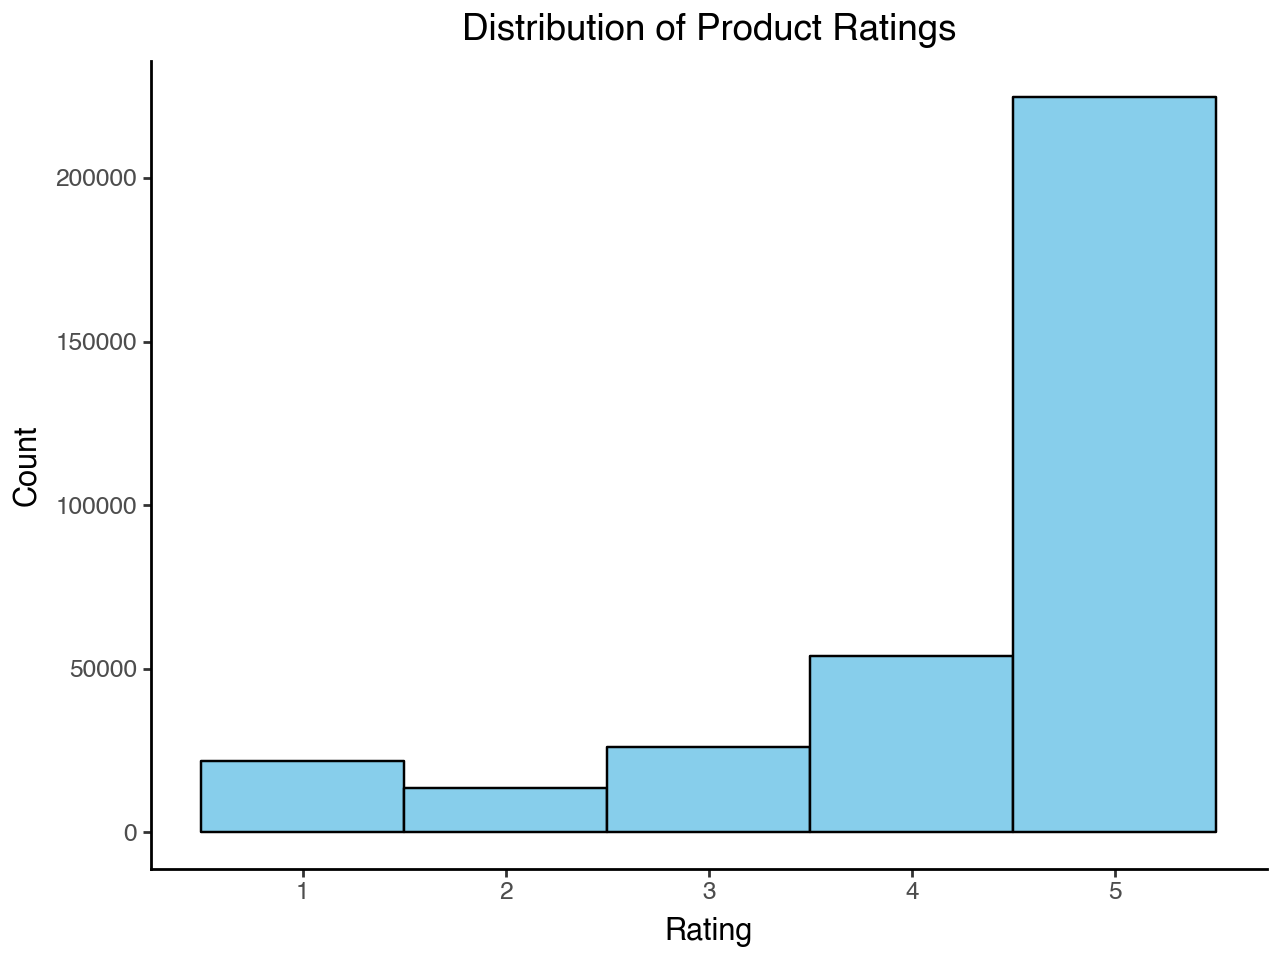

In [45]:
from plotnine import *
import pandas as pd

# rating distribution
(ggplot(df, aes(x='rating'))
 + geom_histogram(binwidth=1, fill='skyblue', color='black')
 + labs(title='Distribution of Product Ratings',
        x='Rating',
        y='Count')
 + theme_classic())

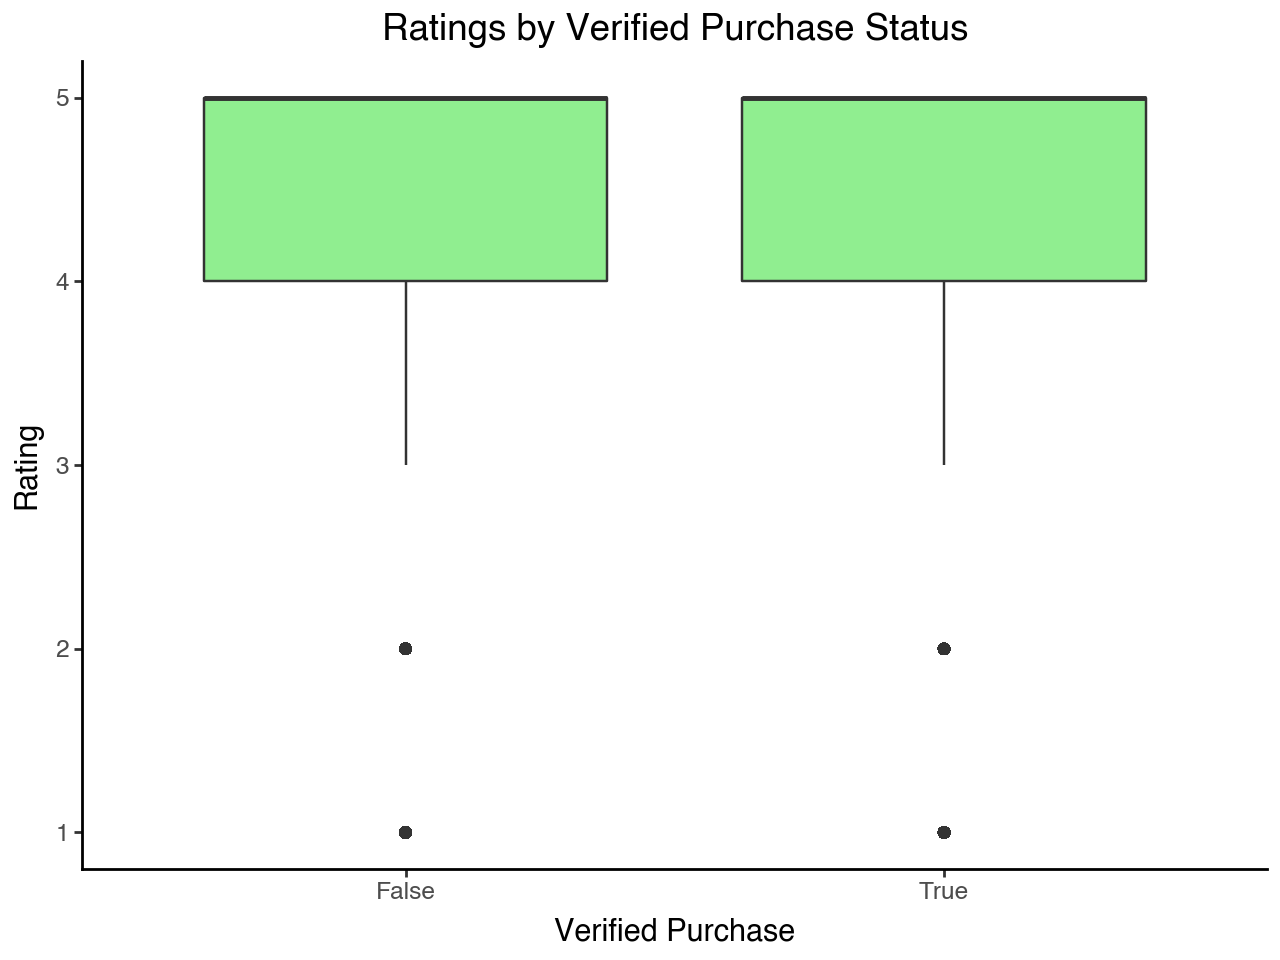

In [46]:
# Verified purchase vs rating
(ggplot(df, aes(x='verified_purchase', y='rating'))
 + geom_boxplot(fill='lightgreen')
 + labs(title='Ratings by Verified Purchase Status',
        x='Verified Purchase',
        y='Rating')
 + theme_classic())

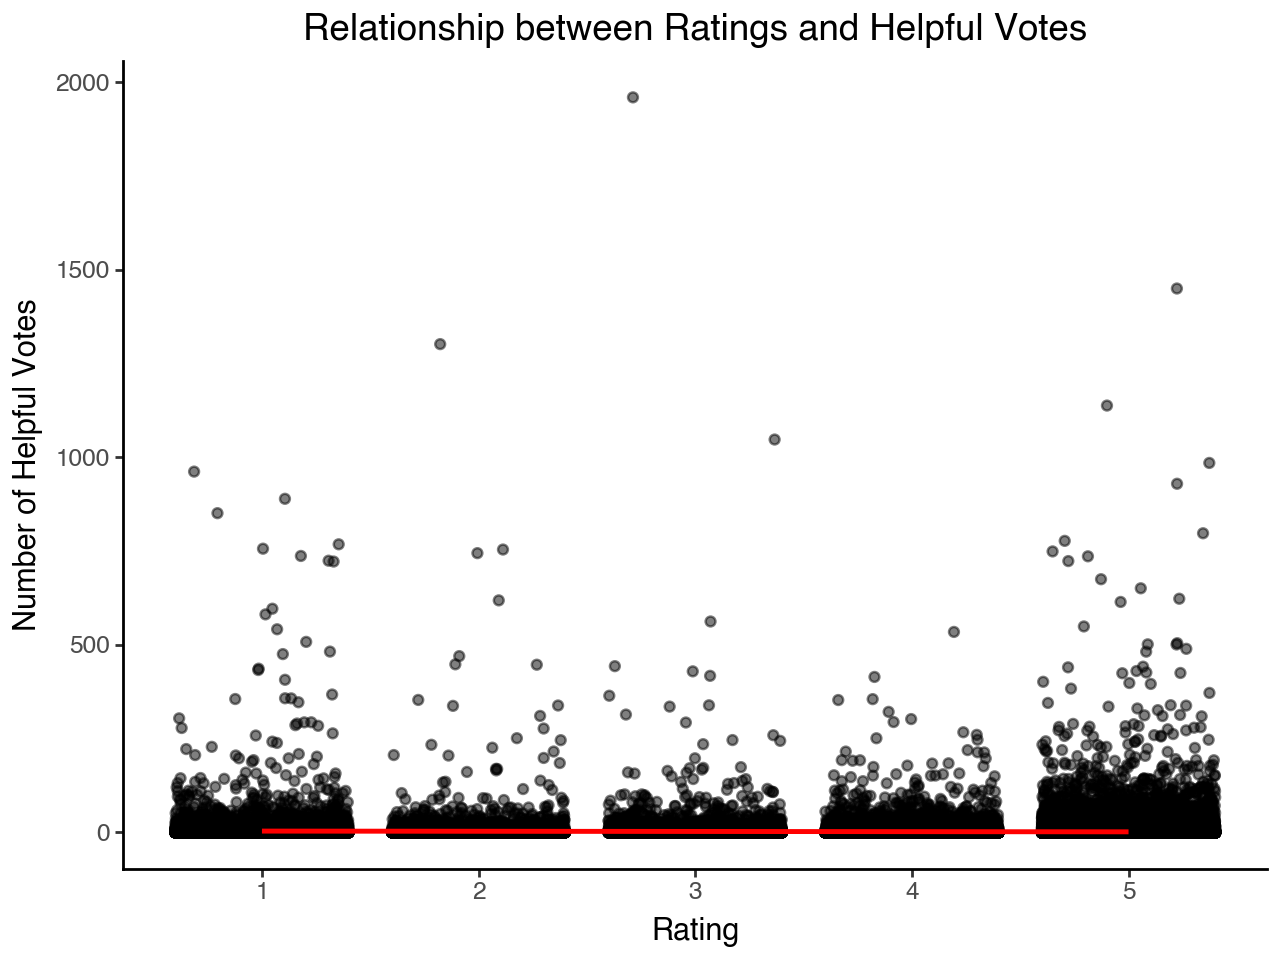

In [47]:
# Relationship between rating and helpful votes
(ggplot(df, aes(x='rating', y='helpful_vote'))
 + geom_jitter(alpha=0.5)
 + geom_smooth(method='lm', color='red')
 + labs(title='Relationship between Ratings and Helpful Votes',
        x='Rating',
        y='Number of Helpful Votes')
 + theme_classic())

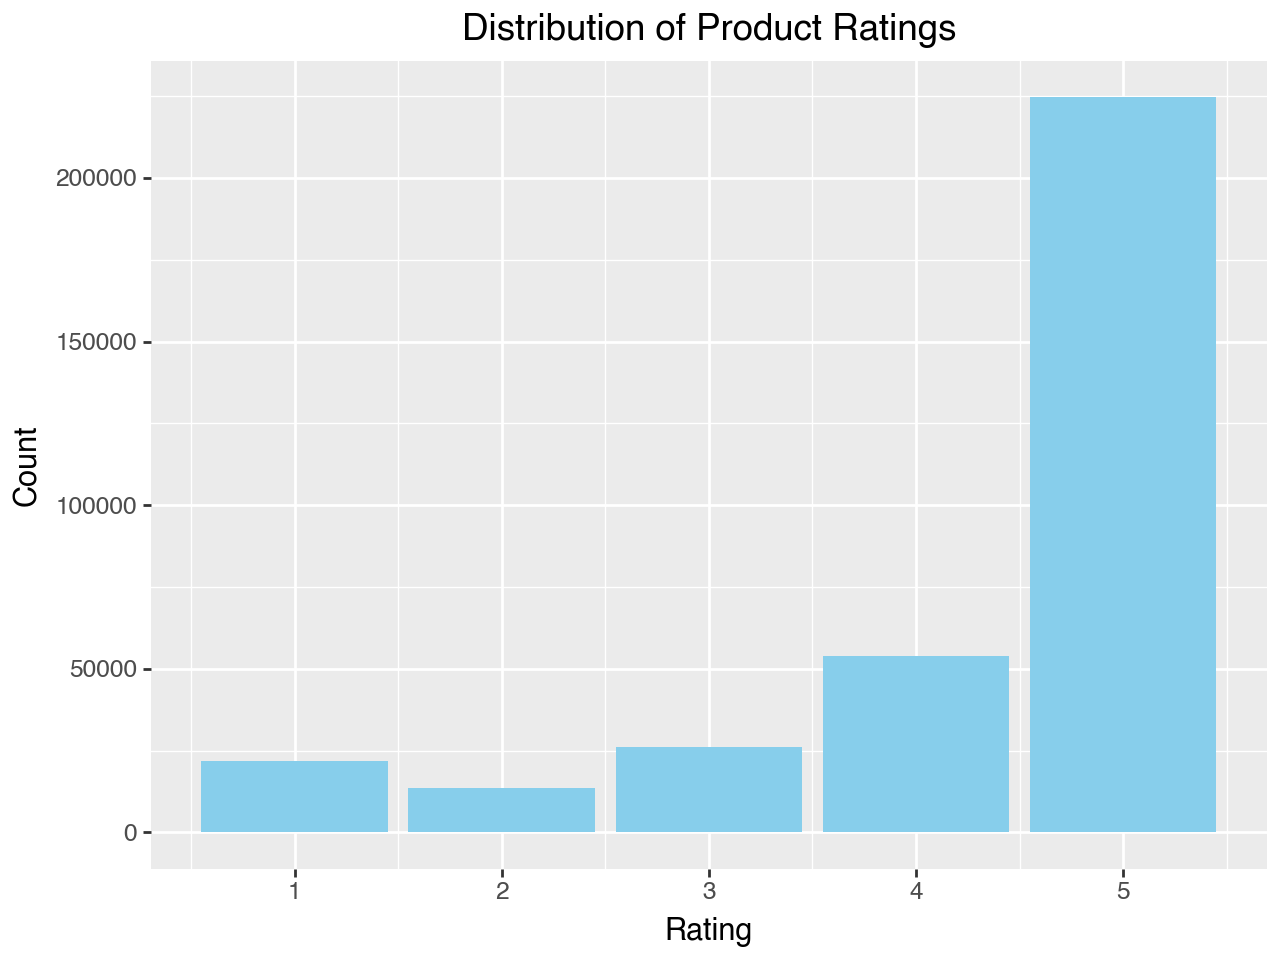

In [48]:
(ggplot(df, aes(x='rating')) 
 + geom_bar(fill='skyblue') 
 + labs(title='Distribution of Product Ratings', 
        x='Rating', 
        y='Count'))


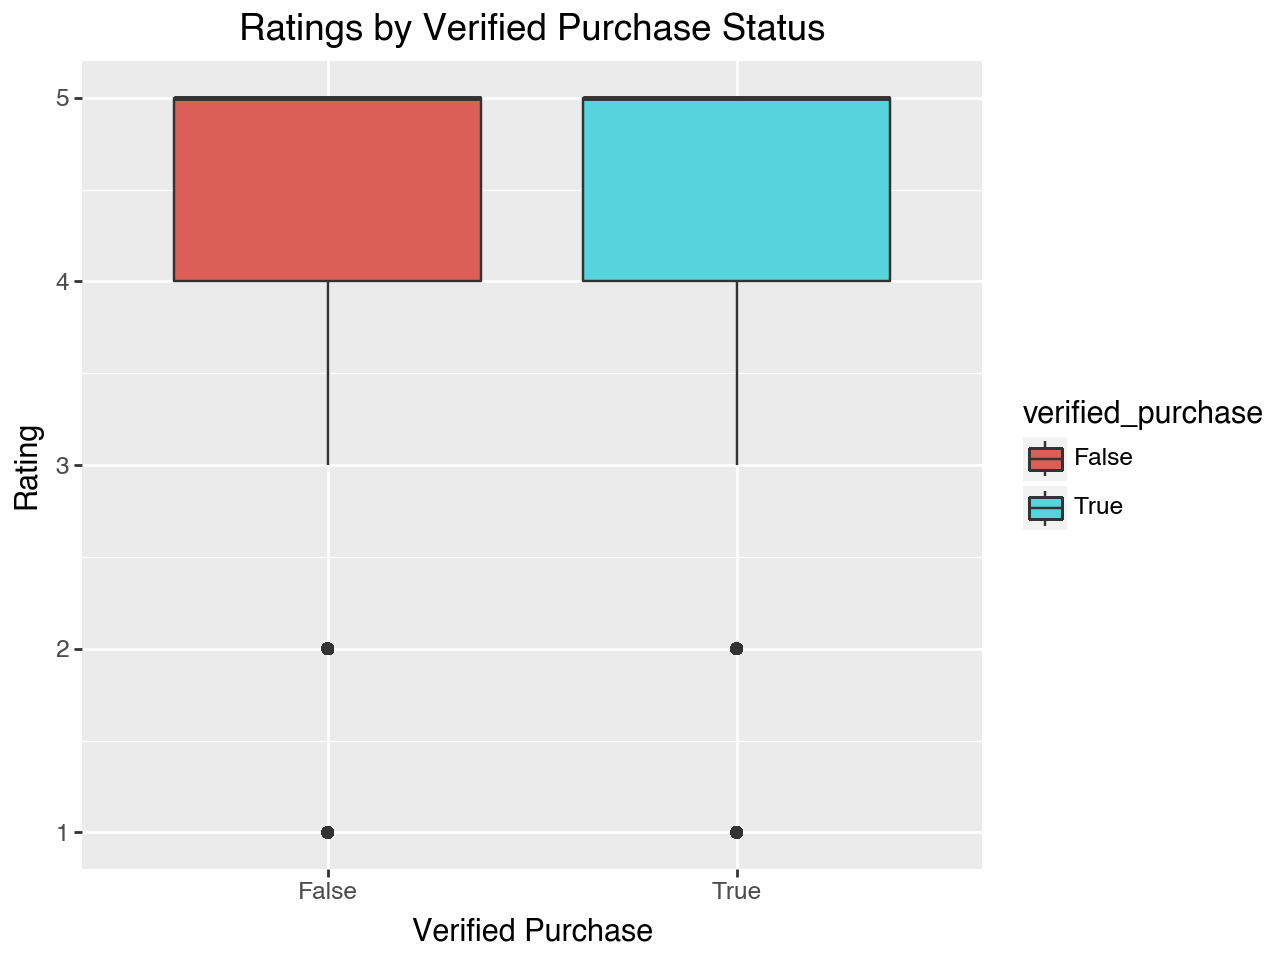

In [49]:
(ggplot(df, aes(x='verified_purchase', y='rating', fill='verified_purchase')) 
 + geom_boxplot() 
 + labs(title='Ratings by Verified Purchase Status',
        x='Verified Purchase',
        y='Rating'))


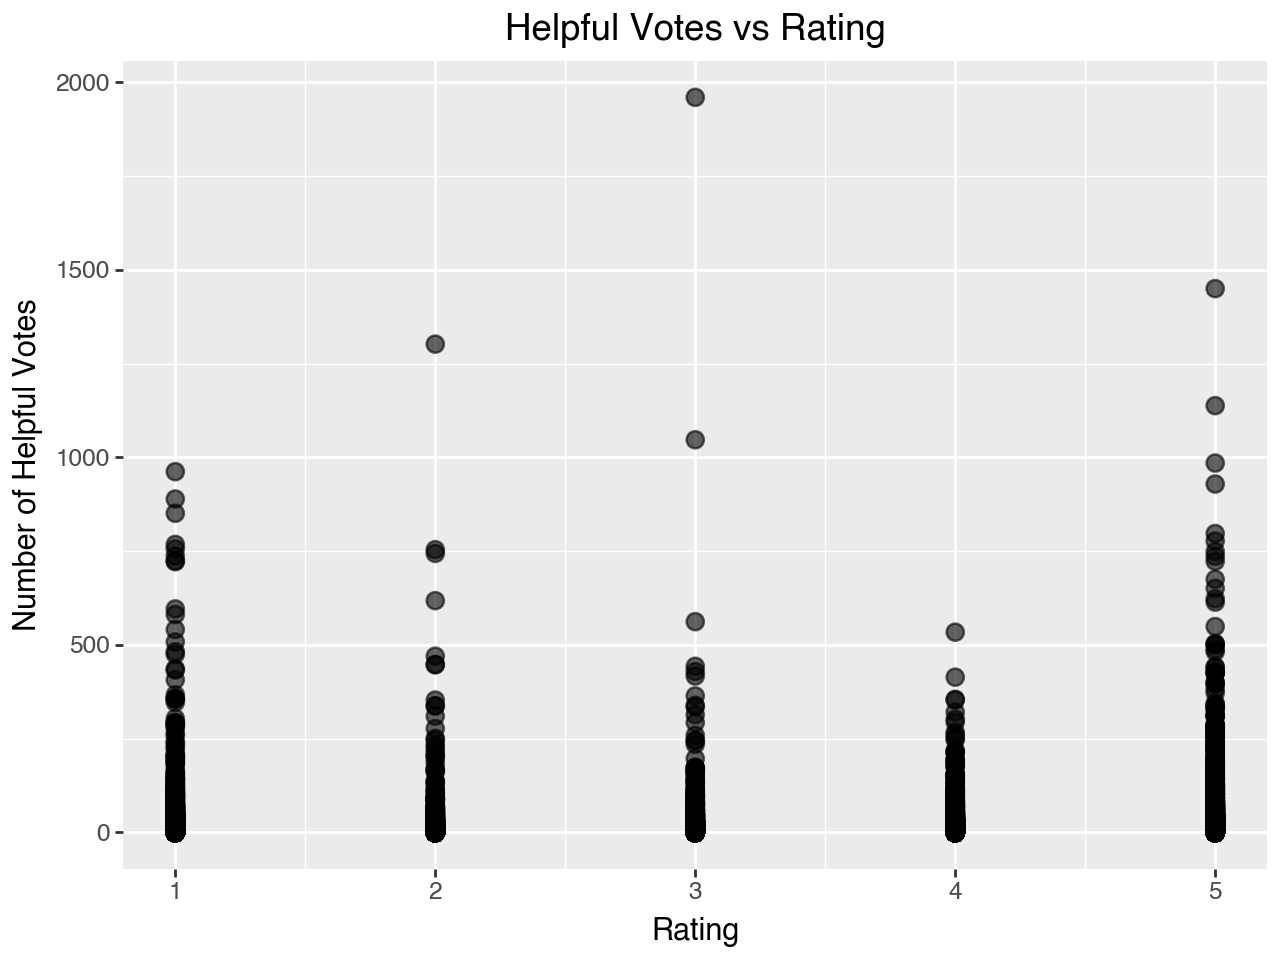

In [50]:
(ggplot(df, aes(x='rating', y='helpful_vote')) 
 + geom_point(size=3, alpha=0.6) 
 + labs(title='Helpful Votes vs Rating',
        x='Rating',
        y='Number of Helpful Votes'))
